In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings    
warnings.filterwarnings('ignore')

In [6]:
df= pd.read_csv('/Users/shivanshmahajan/Desktop/Kidney/kidney_disease.csv')
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [7]:
df.drop('id', axis = 1, inplace = True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             330 non-null    object 
 16  wc              295 non-null    object 
 17  rc              270 non-null    obj

In [9]:
df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [11]:
df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors='coerce')
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')

In [12]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

In [13]:
df['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

df['coronary_artery_disease'] = df['coronary_artery_disease'].replace(to_replace = '\tno', value='no')

df['class'] = df['class'].replace(to_replace = {'ckd\t': 'ckd', 'notckd': 'not ckd'})

In [14]:
df['class'] = df['class'].map({'ckd': 0, 'not ckd': 1})
df['class'] = pd.to_numeric(df['class'], errors='coerce')

In [15]:
df.isna().sum().sort_values(ascending = False)

red_blood_cells            152
red_blood_cell_count       131
white_blood_cell_count     106
potassium                   88
sodium                      87
packed_cell_volume          71
pus_cell                    65
haemoglobin                 52
sugar                       49
specific_gravity            47
albumin                     46
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
blood_pressure              12
age                          9
bacteria                     4
pus_cell_clumps              4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

In [16]:
df[num_cols].isnull().sum()

age                         9
blood_pressure             12
specific_gravity           47
albumin                    46
sugar                      49
blood_glucose_random       44
blood_urea                 19
serum_creatinine           17
sodium                     87
potassium                  88
haemoglobin                52
packed_cell_volume         71
white_blood_cell_count    106
red_blood_cell_count      131
dtype: int64

In [17]:
def random_value_imputation(feature):
    random_sample = df[feature].dropna().sample(df[feature].isna().sum())
    random_sample.index = df[df[feature].isnull()].index
    df.loc[df[feature].isnull(), feature] = random_sample
    
def impute_mode(feature):
    mode = df[feature].mode()[0]
    df[feature] = df[feature].fillna(mode)

In [18]:
for col in num_cols:
    random_value_imputation(col)

In [19]:
df[num_cols].isnull().sum()

age                       0
blood_pressure            0
specific_gravity          0
albumin                   0
sugar                     0
blood_glucose_random      0
blood_urea                0
serum_creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed_cell_volume        0
white_blood_cell_count    0
red_blood_cell_count      0
dtype: int64

In [20]:
random_value_imputation('red_blood_cells')
random_value_imputation('pus_cell')

for col in cat_cols:
    impute_mode(col)

In [21]:
df[cat_cols].isnull().sum()

red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
aanemia                    0
class                      0
dtype: int64

In [22]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [23]:
ind_col = [col for col in df.columns if col != 'class']
dep_col = 'class'

X = df[ind_col]
y = df[dep_col]

In [24]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,219.0,...,38.0,6000.0,5.2,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,4.2,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,0,0,0,0,0,0


In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [26]:
print(X_test.head(1))

      age  blood_pressure  specific_gravity  albumin  sugar  red_blood_cells  \
132  50.0            90.0              1.02      0.0    0.0                1   

     pus_cell  pus_cell_clumps  bacteria  blood_glucose_random  ...  \
132         1                0         0                 219.0  ...   

     haemoglobin  packed_cell_volume  white_blood_cell_count  \
132          8.6                24.0                 13200.0   

     red_blood_cell_count  hypertension  diabetes_mellitus  \
132                   2.7             1                  0   

     coronary_artery_disease  appetite  peda_edema  aanemia  
132                        0         0           1        1  

[1 rows x 24 columns]


In [27]:
y_test

132    0
309    1
341    1
196    0
246    0
      ..
216    0
259    1
49     0
238    0
343    1
Name: class, Length: 120, dtype: int64

In [28]:
from xgboost import XGBClassifier

xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.5, max_depth = 5, n_estimators = 150)
xgb.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of xgboost

xgb_acc = accuracy_score(y_test, xgb.predict(X_test))

print(f"Training Accuracy of XgBoost is {accuracy_score(y_train, xgb.predict(X_train))}")
print(f"Test Accuracy of XgBoost is {xgb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, xgb.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, xgb.predict(X_test))}")

Training Accuracy of XgBoost is 1.0
Test Accuracy of XgBoost is 0.9916666666666667 

Confusion Matrix :- 
[[72  0]
 [ 1 47]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99        72
           1       1.00      0.98      0.99        48

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



serum_creatinine: 0.4034171402454376
specific_gravity: 0.29730406403541565
albumin: 0.16694939136505127
diabetes_mellitus: 0.042479366064071655
haemoglobin: 0.0335816852748394
hypertension: 0.023990852758288383
packed_cell_volume: 0.013562684878706932
blood_glucose_random: 0.009373812936246395
white_blood_cell_count: 0.00440226262435317
blood_urea: 0.003325411817058921
sodium: 0.0005031119217164814
potassium: 0.0004970267182216048
red_blood_cell_count: 0.0004237178363837302
blood_pressure: 0.0001118528307415545
age: 7.7556622272823e-05
bacteria: 0.0
pus_cell_clumps: 0.0
pus_cell: 0.0
red_blood_cells: 0.0
sugar: 0.0
peda_edema: 0.0
coronary_artery_disease: 0.0
appetite: 0.0
aanemia: 0.0


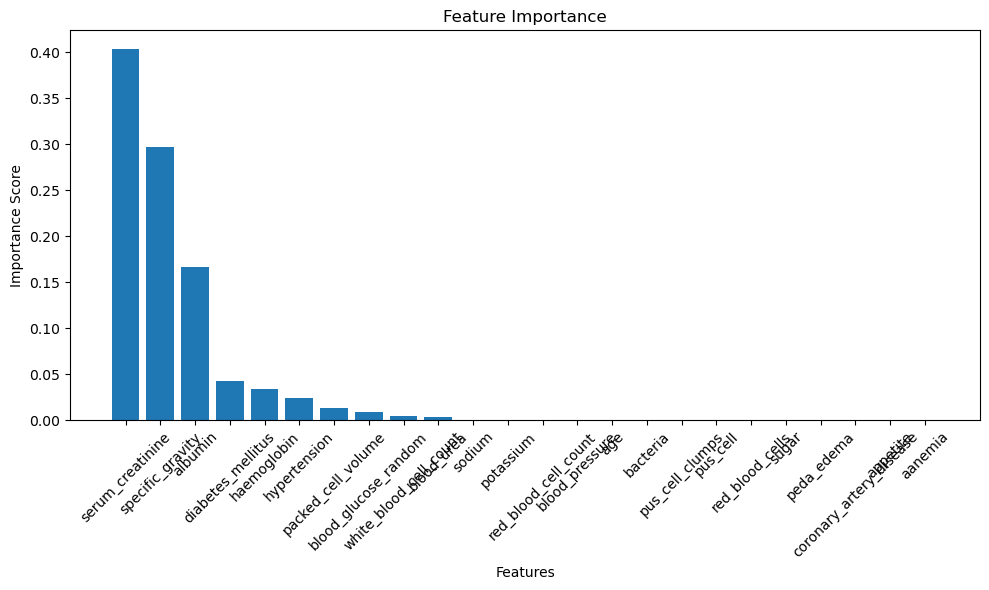

In [29]:
feature_importances = xgb.feature_importances_
#print(feature_importances)
sorted_indices = np.argsort(feature_importances)[::-1]

# Arrange feature importances and names in the sorted order
sorted_importances = feature_importances[sorted_indices]
sorted_names = np.array(df.columns)[sorted_indices]
for name, importance in zip(sorted_names, sorted_importances):
    print(f"{name}: {importance}")
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_importances)), sorted_importances, align="center")
plt.xticks(range(len(sorted_importances)), sorted_names, rotation=45)
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.title("Feature Importance")
plt.tight_layout()
plt.show()

In [30]:
col = ['serum_creatinine', 'specific_gravity', 'albumin', 'diabetes_mellitus', 'haemoglobin', 'hypertension', 'blood_pressure']

In [31]:
df_drop=df[col].copy()

In [32]:
df_drop.head()

,serum_creatinine,specific_gravity,albumin,diabetes_mellitus,haemoglobin,hypertension,blood_pressure
0,1.2,1.020,1.0,1,15.4,1,80.0
1,0.8,1.020,4.0,0,11.3,0,50.0
2,1.8,1.010,2.0,1,9.6,0,80.0
3,3.8,1.005,4.0,0,11.2,1,70.0
4,1.4,1.010,2.0,0,11.6,0,80.0


In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_drop, y, test_size = 0.30, random_state = 0)

In [34]:
from xgboost import XGBClassifier

xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.5, max_depth = 5, n_estimators = 150)
xgb.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of xgboost

xgb_acc = accuracy_score(y_test, xgb.predict(X_test))

print(f"Training Accuracy of XgBoost is {accuracy_score(y_train, xgb.predict(X_train))}")
print(f"Test Accuracy of XgBoost is {xgb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, xgb.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, xgb.predict(X_test))}")

Training Accuracy of XgBoost is 1.0
Test Accuracy of XgBoost is 0.9833333333333333 

Confusion Matrix :- 
[[72  0]
 [ 2 46]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        72
           1       1.00      0.96      0.98        48

    accuracy                           0.98       120
   macro avg       0.99      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



In [35]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120 entries, 132 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   serum_creatinine   120 non-null    float64
 1   specific_gravity   120 non-null    float64
 2   albumin            120 non-null    float64
 3   diabetes_mellitus  120 non-null    int64  
 4   haemoglobin        120 non-null    float64
 5   hypertension       120 non-null    int64  
 6   blood_pressure     120 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 7.5 KB


In [36]:
X_test.to_csv()

',serum_creatinine,specific_gravity,albumin,diabetes_mellitus,haemoglobin,hypertension,blood_pressure\n132,13.8,1.02,0.0,0,8.6,1,90.0\n309,1.2,1.02,0.0,0,17.2,0,60.0\n341,0.9,1.025,0.0,0,13.4,0,70.0\n196,11.8,1.01,3.0,1,8.1,1,100.0\n246,15.2,1.015,3.0,0,8.6,1,110.0\n60,3.2,1.02,1.0,0,12.5,1,90.0\n155,1.8,1.02,3.0,0,11.1,0,70.0\n261,1.2,1.02,0.0,0,17.0,0,80.0\n141,6.0,1.01,1.0,0,6.1,1,70.0\n214,1.0,1.015,0.0,1,13.7,0,80.0\n37,3.4,1.025,1.0,1,9.7,1,80.0\n134,16.9,1.01,0.0,1,10.8,0,100.0\n113,0.7,1.015,0.0,1,7.9,0,90.0\n348,0.5,1.02,0.0,0,13.6,0,80.0\n12,2.1,1.015,3.0,1,9.7,1,70.0\n59,6.4,1.015,2.0,1,6.6,1,100.0\n293,1.2,1.02,0.0,0,14.9,0,80.0\n140,1.2,1.01,0.0,0,12.4,0,70.0\n206,3.9,1.01,1.0,0,13.8,1,70.0\n199,1.5,1.015,0.0,0,8.8,1,80.0\n176,1.7,1.01,4.0,0,8.3,0,90.0\n268,1.0,1.015,0.0,0,16.3,0,80.0\n124,2.5,1.015,0.0,0,9.1,1,100.0\n344,0.7,1.02,0.0,0,14.4,0,60.0\n175,2.2,1.01,0.0,0,15.8,1,50.0\n313,0.9,1.02,0.0,0,17.3,0,80.0\n78,3.2,1.02,0.0,0,10.1,1,80.0\n15,9.6,1.015,3.0,0,7.6,1,80.0\

In [37]:
xgb.predict(X_test)

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1])

In [38]:
test={}

In [139]:
import joblib
joblib.dump(xgb, 'kidney_disease_model.joblib')
loaded_model = joblib.load('kidney_disease_model.joblib')

In [140]:
import pickle


In [141]:
with open('kidney_disease_model.pkl', 'wb') as file:
    pickle.dump(xgb, file)

In [142]:
with open('kidney_disease_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)


In [144]:
input_data=(16.9,1.01,0.0,1,10.8,0,100.0)
input_data=np.asarray(input_data)
input_data_reshaped=input_data.reshape(1,-1)
prediction=loaded_model.predict(input_data_reshaped)
#print(prediction)
if(prediction==0):
    print('the person is not having kidney disease')
else:
    print('the person is having Kideny Disease')

the person is not having kidney disease
